In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt      
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('hour.csv')

In [3]:
data.drop(['instant','dteday'],axis=1,inplace=True)

In [4]:
z = data.drop('workingday', axis=1)
t = data['workingday']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(z, t, test_size = 0.20, random_state = 130)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((13903, 14), (3476, 14), (13903,), (3476,))

# Testons le modéle kmeans avec l'ensemble des données 

In [9]:
kmeans = KMeans(n_clusters=5).fit(data)
kmeans.predict(data)

array([3, 3, 3, ..., 3, 3, 3])

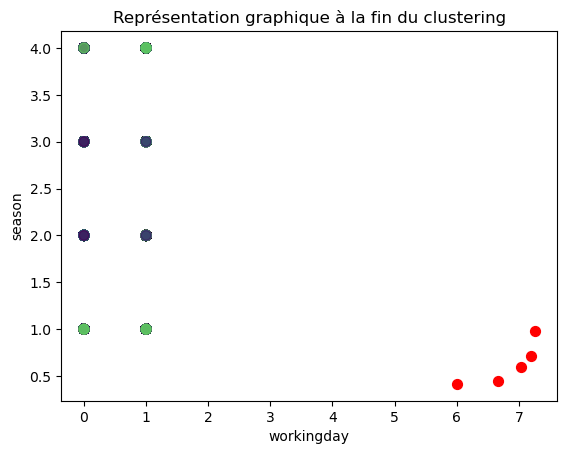

In [10]:
centroids = kmeans.cluster_centers_
plt.title("Représentation graphique à la fin du clustering")
plt.xlabel('workingday')
plt.ylabel('season')

plt.scatter(data['workingday'], data['season'], c= kmeans.labels_.astype(int), s=50, alpha=0.5)
plt.scatter(centroids[:, 2], centroids[:, 1], c='red', s=50)

Text(0.5, 1.0, 'Graphique Elbow pour different valeur de k')

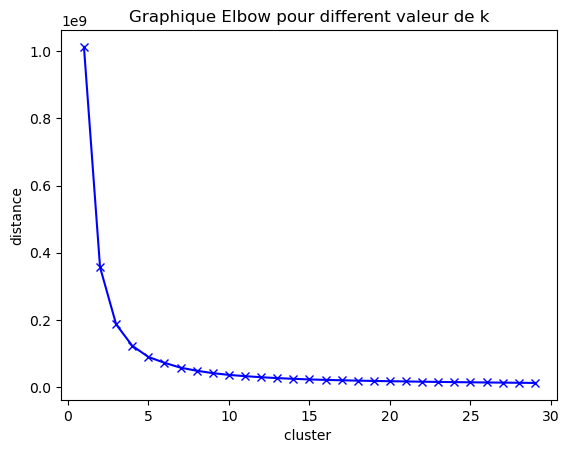

In [12]:
sd = []
k_range = range(1,30)
for k in k_range:
    model = KMeans(n_clusters = k).fit(data)
    sd.append(model.inertia_)
plt.plot(k_range,sd,'bx-')
plt.xlabel('cluster ')
plt.ylabel('distance')
plt.title('Graphique Elbow pour different valeur de k')

# Testons le kmeans avec les données du training et du testing 

In [13]:
kmeans = KMeans(n_clusters=5).fit(x_train, y_train)
kpred = kmeans.predict(x_test)
pd.DataFrame(np.c_[y_test,kpred],columns=['Actuelle','Prediction'])

,Actuelle,Prediction
0,0,0
1,1,4
2,1,4
3,1,0
4,0,1
...,...,...
3471,1,0
3472,0,4
3473,1,0
3474,1,0
